### Get session info

In [1]:
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/NMJ_imaging/uf-GCaMP/'
# imgPath = 'Y:\\/NMJ_imaging\\uf-GCaMP\\'
# imgPath = '/Users/zhengj10/Desktop/Recent data/NMJ/ufGCaMP/'
params = {
          'frameInterval': 128.5,
          'shutterCloseFrames': 0, # No. of frames before shutter open
          'truncatedFrames': 290,    # No. of frames to be further deleted for rendering 1s baseline in plot
          'stimStart': 3527.8       # Time (in ms) when electrical stimulation is delivered
         }


### Import modules

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import scipy.io as sio


### Data sorting

In [3]:
# df = pd.read_excel(imgPath + 'summary_low_affinity_GCaMP_1-160Hz.xlsx', index_col = 0)
df = pd.read_excel(imgPath + 'summary_uf-GCaMP_tdtomato_1-320Hz.xlsx', index_col = 0)
df_f0 = pd.read_excel(imgPath + 'F0_all_boutons.xlsx', index_col = 0)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 10)
df_f0


,sensors,F0_all_boutons,F0_minus_Fb_all_boutons
0,GCaMP456,189.02...,22.394425
1,GCaMP456,195.44...,28.813279
2,GCaMP456,190.88...,24.251915
3,GCaMP456,190.30...,23.672848
4,GCaMP456,200.94...,34.310804
...,...,...,...
161,GCaMP688,190.17...,45.052613
162,GCaMP686,186.40...,31.141536
163,GCaMP686,186.44...,31.182847
164,GCaMP686,201.38...,46.118690


### Group dff traces by sensor type

In [4]:
from scipy.signal import butter,filtfilt# Filter requirements.
T = 14.0         # Sample Period
fs = 128.5       # sample rate, Hz
cutoff = 20      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples
t = np.linspace(0,14,1800)

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



In [5]:
# df_sorted = df[(df.Mother_line=='57C10-Gal4') & (df.Father_line_landing_site=='su(Hw)attP5')]
# df_sorted = df[(df.Mother_line=='nsyb-LexA') & (df.Father_line_landing_site=='su(Hw)attP8')]
# df_sorted = df[(df.Mother_line=='nsyb-LexA') & (df.Father_line_landing_site=='VK00005')]
# df_sorted = df[(df.Mother_line=='57C10-Gal4') & (df.Father_line_landing_site=='To be updated')]
# df_sorted = df[df.Sensor == 'GCaMP7f']

df_sorted = df

sensorTypes = df_sorted.Sensor.unique()

# print('Total sensors: %d' %len(sensorTypes))
dffAll = {}
f0All = {}

# for opt in ['codon optimized','non codon optimized']:
for sensorType in(sensorTypes):
    
    if sensorType in ['GCaMP456','GCaMP455','GCaMP543']:
#         print(sensorType)
        df_sensor = df_sorted[(df_sorted.Sensor == sensorType)&(df_sorted['Codon optimization'] == 'codon optimized')]
    else:
        df_sensor = df_sorted[df_sorted.Sensor == sensorType]

#     df_sensor = df_sorted[df_sorted['Codon optimization'] == opt]
    
    dffList = []
    f0List = []
    for index, row in df_sensor.iterrows():

        if row['Date'] == 210112 and row['Larva_ID']=='Larva_2':
            print(sensorType)
            continue
            
        matFile = os.path.join(imgPath, str(row['Date']), row['Larva_ID'], row['FOV_ID'], 'summary/_dff.mat')
        if not os.path.exists(matFile):
            print(sensorType)
            print(matFile)
            print("no mat file found!")
            continue
        dffSingleFOV = sio.loadmat(matFile)
        dffArray = dffSingleFOV['dff']
        
#         dffArray = butter_lowpass_filter(dffArray, cutoff, fs, order)

        dffList.append(dffArray)
        matFile = os.path.join(imgPath, str(row['Date']), row['Larva_ID'], row['FOV_ID'], 'summary/_f0.mat')
        f0SingleFOV = sio.loadmat(matFile)
        f0Array = f0SingleFOV['f0']
        
        print(sensorType, dffArray.shape, f0Array.shape)

        f0List.append(f0Array)
    
    dffAllROIs = np.concatenate(dffList, axis=1)
    f0AllROIs = np.concatenate(f0List, axis=1)
    print (dffAllROIs.shape)
    dffAll[sensorType] = dffAllROIs
    f0All[sensorType] = f0AllROIs
    

#     dffAll[opt] = dffAllROIs
#     f0All[opt] = f0AllROIs


GCaMP456 (9, 5, 1800) (1, 9)
GCaMP456 (9, 7, 1800) (1, 9)
GCaMP456 (9, 8, 1800) (1, 9)
GCaMP456 (9, 4, 1800) (1, 9)
GCaMP456 (9, 3, 1800) (1, 9)
(9, 27, 1800)
GCaMP455 (9, 7, 1800) (1, 9)
GCaMP455 (9, 3, 1800) (1, 9)
(9, 10, 1800)
GCaMP7f (9, 3, 1800) (1, 9)
GCaMP7f (9, 3, 1800) (1, 9)
GCaMP7f (9, 6, 1800) (1, 9)
GCaMP7f (9, 4, 1800) (1, 9)
GCaMP7f (9, 5, 1800) (1, 9)
(9, 21, 1800)
GCaMP712 (9, 4, 1800) (1, 9)
GCaMP712 (9, 7, 1800) (1, 9)
(9, 11, 1800)
GCaMP543 (9, 6, 1800) (1, 9)
GCaMP543 (9, 3, 1800) (1, 9)
(9, 9, 1800)
GCaMP640
GCaMP640 (9, 3, 1800) (1, 9)
(9, 3, 1800)
GCaMP688 (9, 5, 1800) (1, 9)
GCaMP688 (9, 4, 1800) (1, 9)
GCaMP688 (9, 6, 1800) (1, 9)
GCaMP688 (9, 6, 1800) (1, 9)
GCaMP688 (9, 4, 1800) (1, 9)
(9, 25, 1800)
GCaMP707 (9, 5, 1800) (1, 9)
GCaMP707 (9, 3, 1800) (1, 9)
(9, 8, 1800)
GCaMP686 (9, 4, 1800) (1, 9)
GCaMP686 (9, 5, 1800) (1, 9)
GCaMP686 (9, 6, 1800) (1, 9)
GCaMP686 (9, 6, 1800) (1, 9)
GCaMP686 (9, 4, 1800) (1, 9)
(9, 25, 1800)
XCaMP (9, 4, 1800) (1, 9)
XCaMP


In [6]:
f0AllROIs.shape

(1, 9)

In [7]:
f0Array

array([[168.78204561, 162.45908307, 158.46371783, 155.59230653,
        153.75621151, 152.20950701, 151.05936523, 150.68498771,
        150.55950528]])

In [8]:
df.Sensor.unique()

array(['GCaMP456', 'GCaMP455', 'GCaMP7f', 'GCaMP712', 'GCaMP543',
       'GCaMP640', 'GCaMP688', 'GCaMP707', 'GCaMP686', 'XCaMP'],
      dtype=object)

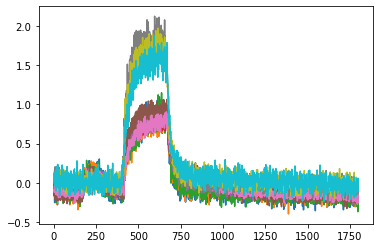

In [9]:
for roi in range(10):
    plt.plot(dffAll['GCaMP455'][3][roi])


In [10]:
# for k, v in dffAll.items(): # dffAll.items() for Python 3
#     print (k)
#     print (v.shape)
    

### dff frequency responses for all sensors

XCaMP


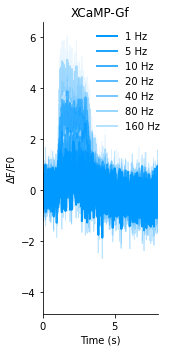

In [11]:
import seaborn as sns
trialMap = {
            1: '1 Hz',
            2: '5 Hz',
            3: '10 Hz',
            4: '20 Hz',
            5: '40 Hz',
            6: '80 Hz',
            7: '160 Hz',
            8: '240 Hz',
            9: '320 Hz'
           }

colorMap = {
            'GCaMP7f': '#00ff00',
            'GCaMP456': '#0000ff',
            'GCaMP686': '#ff0000',
            'GCaMP688': '#666666',
            'XCaMP': '#0099ff'
           }



# colorMap ={'GCaMP7f':'green',
#                 'GCaMP456':'blue',
#                 'GCaMP686':'red',
#                 'GCaMP688':'black',
#                 'XCaMP': 'orange'
#           }


titlesMap = {
            'GCaMP7f': 'jGCaMP7f',
            'GCaMP456': 'jGCaMP8f',
            'GCaMP686': 'jGCaMP8m',
            'GCaMP688': 'jGCaMP8s',
            'XCaMP': 'XCaMP-Gf'
           }

# figOrders = ['GCaMP6s', 'GCaMP7b', 'GCaMP7c', 'GCaMP7f', 'GCaMP7s']
# figOrders = [u'GCaMP779', u'GCaMP783', u'GCaMP804', u'GCaMP834']
# figOrders = [u'GCaMP6f', u'GCaMP6s', u'GCaMP725', u'GCaMP734', u'GCaMP779', u'GCaMP783', u'GCaMP804', u'GCaMP834'] 
# figOrders = ['GCaMP456','GCaMP455','GCaMP7f']
# figOrders = ['GCaMP7f','GCaMP456','GCaMP455','GCaMP712','GCaMP543','GCaMP640','GCaMP688','GCaMP707','GCaMP686','XCaMP']
# figOrders = ['GCaMP7f','GCaMP456','GCaMP686','GCaMP688']
figOrders = ['XCaMP']
# figOrders = ['codon optimized','non codon optimized']
# figOrders = ['GCaMP7f']
fig = plt.figure(figsize=(2.5,5))
# fig = plt.figure(figsize=(2.15,3))
subplotPos = 0
# for sensor, traces in dffAll.iteritems():
sns.reset_orig()
ax = plt.subplot(111)


for sensor in(figOrders):
    print(sensor)

    
#     if sensor=='GCaMP455' and trialNum==3:
#         print(np.std(rawAll[sensor][trialNum,roiNum,200:300])
    mean = np.mean(dffAll[sensor], axis = 1)
#     mean = np.mean(rawAll[sensor], axis = 1)

    sem = np.std(dffAll[sensor], axis = 1)/np.sqrt(dffAll[sensor].shape[1])
#     sem = np.std(rawAll[sensor], axis = 1)/np.sqrt(rawAll[sensor].shape[1])

    subplotPos += 1
#     if subplotPos <6:
#     ax = plt.subplot(1,4,subplotPos)

        
#     for trialNum in range(mean.shape[0]):
    q = []
    for trialNum in range(7):
#     for trialNum in range(4):
#         if trialNum == 1:
#             continue
        
        ax.plot(np.arange(1, mean.shape[1] + 1)/params['frameInterval']-2.21, mean[trialNum], lw=2,
                label=trialMap[trialNum+1],color = colorMap[sensor],alpha=(7-trialNum/1.2)/7.0)
        ax.fill_between(np.arange(1, mean.shape[1] + 1)/params['frameInterval']-2.21, mean[trialNum]-sem[trialNum],
                        mean[trialNum]+sem[trialNum], color = colorMap[sensor],alpha=0.25*(7-trialNum/1.2)/7.0)
        
        
        
        
#         ax.plot(np.arange(385,488)/params['frameInterval']-2.21, mean[trialNum][385:488], lw=2,
#                 label=trialMap[trialNum+1],color = colorMap[sensor],alpha=(7-trialNum/1.2)/7.0)
#         ax.fill_between(np.arange(385,488)/params['frameInterval']-2.21, mean[trialNum][385:488]-
#                         sem[trialNum][385:488],mean[trialNum][385:488]+sem[trialNum][385:488],
#                         color = colorMap[sensor],alpha=0.25*(7-trialNum/1.2)/7.0)




#         ax.plot(np.arange(1, mean.shape[1] + 1), mean[trialNum], lw=1,
#                     label=trialMap[trialNum+1],color = colorMap[trialNum+1])
    
#         if sensor == 'GCaMP7f':
#         if sensor == 'non codon optimized':

        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

leg = ax.legend()
leg = ax.legend(loc='upper right',bbox_to_anchor=(1.1,1), ncol=1) 
leg.get_frame().set_linewidth(0.0)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')


ax.set_title(titlesMap[sensor])
ax.set_xlabel('Time (s)')
ax.set_ylabel('\u0394F/F0')



#         ax.axis.label.set_color('#4B4B4B')
#     ax.set_ylim([-0.15, 0.2])
#     ax.set_ylim([-0.15, 12.5])
#     ax.set_ylim([-0.1, 2.5])

#     ax.set_xlim([3.2,3.8])
#     if sensor == 'GCaMP712':
# #     if sensor == 'non codon optimized':
#         y_lim = ax.get_ylim()
#     ax.set_ylim([-0.5,10])
# #     ax.set_xlim([2.5,8.5])
    
#     ax.set_xlim([660,680])
    
#     ax.set_ylim([-0.5,1.6])
#     ax.set_xlim([2.8,4.9])
#     ax.set_ylim([150,450])
    
# ax.set_ylim([-0.2, 9.0051329609305])
# ax.set_ylim([-0.1, 2.35])
# ax.set_xlim(a[300],a[1500]) 
# ax.set_xlim([0.8,1.6])

#     if sensor=='GCaMP7f':
#         print(ax.get_ylim())

ax.set_xlim([0,8])
plt.tight_layout()
savePath = '/Users/zhengj10/Desktop/'
# fig.savefig('/Users/zhengj10/Desktop/figure_NMJ/686_1-10Hz.pdf',format='pdf')
# fig.savefig('/Users/zhengj10/Desktop/NMJ_imaging/688_1-10Hz.pdf',format='pdf')
# fig.savefig(savePath + 'XCaMP.pdf',format='pdf')
# 
plt.show()


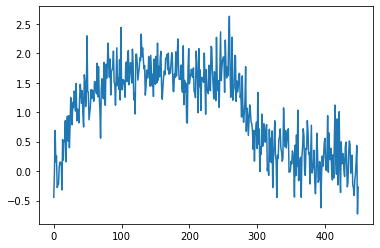

In [12]:
plt.plot(mean[3][405:855])


In [13]:
window = {
    1:128.5,
    5:25.7,
    10:12.85,
    20:6.425
}



### average of individual dFFs at 1-20 Hz

In [14]:
trialMap = {
            1: '1 Hz',
            2: '5 Hz',
            3: '10 Hz',
            4: '20 Hz',
            5: '40 Hz',
            6: '80 Hz',
            7: '160 Hz',
            8: '240 Hz',
            9: '320 Hz'
           }


# colorMap ={'GCaMP7f':'green',
#                 'GCaMP456':'blue',
#                 'GCaMP686':'red',
#                 'GCaMP688':'black',
#                 'XCaMP': 'orange'
#           }


titlesMap = {
            'GCaMP7f': 'jGCaMP7f',
            'GCaMP456': 'jGCaMP8f',
            'GCaMP686': 'jGCaMP8m',
            'GCaMP688': 'jGCaMP8s',
            'XCaMP': 'XCaMP'
           }


figOrders = ['GCaMP456','GCaMP686','GCaMP688','GCaMP7f']

k = 20

Sensor = []
mean_dFF = []
dFF=  []
for sensor in(figOrders):
#     print(sensor)
    mean_dff = []
    
    for roi in range(dffAll[sensor].shape[1]):
#         print(dffAll[sensor].shape[1])
        for stim in range(2*k):


            seg=dffAll[sensor][3][roi][415-int(window[k]*1/3)+int(stim*window[k]):415+int(window[k]*2/3)+int(stim*window[k])]
            individual_dff = np.max(seg)-np.min(seg)
            mean_dff.append(individual_dff)
        mean_dFF = np.mean(mean_dff)
        Sensor.append(sensor)
        dFF.append(mean_dFF)
    
    

In [15]:
df_dff_low_freq = pd.DataFrame({'Sensor':Sensor,'individual_dFF':dFF})

In [16]:
df_dff_low_freq.shape

(98, 2)

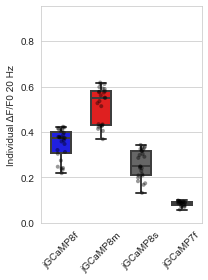

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,4))
ax  = plt.subplot(111)

sns.set_style("whitegrid")
hits_label = ['jGCaMP8f','jGCaMP8m','jGCaMP8s','jGCaMP7f']

# colors =['green','blue','red','black']
colors = ['#0000ff','#ff0000','#666666','#00ff00']
# colors = ['#00ff00','#0000ff','#ff0000','#666666','#0099ff'] # Last one is XCaMP


sns.stripplot(ax = ax, x="Sensor", y='individual_dFF', data=df_dff_low_freq,
                   size=4,
                   alpha=0.4,
                  #zorder=1,
                  color='k')

sns.boxplot(x="Sensor", y='individual_dFF', data=df_dff_low_freq,
                 showfliers=False, 
                 linewidth=2,
                 width=.5,
                 #zorder=100,
                 palette = colors,
            ax=ax
                )

ax.set_xticklabels(hits_label,rotation=45)




# sns.swarmplot(x="Sensor", y='individual_dFF', data=df_dff_low_freq, ax = ax, size=6, dodge=True, alpha=0.4, palette=colors)
# ax = sns.barplot(x="Sensor", y='individual_dFF', data=df_dff_low_freq, ax = ax, alpha=0.4, palette=colors,capsize=0.3)
# # sb = sns.boxplot(x="Pipette", y=value, data=df, ax = ax, boxprops=dict(alpha=0.4),showfliers=False)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# # ylabel = value + ' (\u03BCm)'
# # ax.set_ylabel(ylabel,size=12)
# # ax.set_xlabel('Pipette #',size=12)

# patches = ax.patches
# lines_per_err = 3

# for i, line in enumerate(ax.get_lines()):
#     newcolor = patches[i // lines_per_err].get_facecolor()
#     line.set_color(newcolor)
# plt.xticks([0,1,2,3], ['jGCaMP8f','jGCaMP8m','jGCaMP8s','jGCaMP7f'], rotation=45, ha = 'right')
ax.set_xlabel('')
ax.set_ylabel('Individual \u0394F/F0 20 Hz')
ax.set_ylim([-0.00041996960752363477, 0.9529216335022663])
plt.tight_layout()


# fig.savefig('/Users/zhengj10/Desktop/F0.png')
# fig.savefig('/Users/zhengj10/Desktop/20Hz_bar.pdf',format='pdf')
plt.show()


In [ ]:
ax.plot?

In [ ]:
ax.get_xlim()

In [ ]:
ax.get_ylim()

In [ ]:

# plt.tight_layout()


In [ ]:
plt.plot(mean[2])

### SNR with raw data

In [20]:
df_sorted = df
sensorTypes = df_sorted.Sensor.unique()

rawAll = {}
f0All = {}

for sensorType in(sensorTypes):
    if sensorType in ['GCaMP456','GCaMP455','GCaMP543']:
        df_sensor = df_sorted[(df_sorted.Sensor == sensorType)&(df_sorted['Codon optimization'] == 'codon optimized')]
    else:
        df_sensor = df_sorted[df_sorted.Sensor == sensorType]
    
    rawList = []
    f0List = []
    for index, row in df_sensor.iterrows():

        if row['Date'] == 210112 and row['Larva_ID']=='Larva_2':
#             print(sensorType)
            continue
            
        matFile = os.path.join(imgPath, str(row['Date']), row['Larva_ID'], row['FOV_ID'], 'summary/_raw.mat')
        if not os.path.exists(matFile):
            print(sensorType)
            print("no mat file found!")
            continue
        rawSingleFOV = sio.loadmat(matFile)
        rawArray = rawSingleFOV['raw']

        rawList.append(rawArray)
        matFile = os.path.join(imgPath, str(row['Date']), row['Larva_ID'], row['FOV_ID'], 'summary/_f0.mat')
        f0SingleFOV = sio.loadmat(matFile)
        f0Array = f0SingleFOV['f0']
        f0List.append(f0Array)
    
    rawAllROIs = np.concatenate(rawList, axis=1)
    f0AllROIs = np.concatenate(f0List, axis=1)
    print (rawAllROIs.shape)
    rawAll[sensorType] = rawAllROIs
    f0All[sensorType] = f0AllROIs


GCaMP456
no mat file found!
GCaMP456
no mat file found!
GCaMP456
no mat file found!
GCaMP456
no mat file found!
GCaMP456
no mat file found!


ValueError: need at least one array to concatenate

In [21]:
# fig = plt.figure(figsize=(12,8))
subplotPos = 0
figOrders = ['GCaMP7f','GCaMP456','GCaMP455','GCaMP712','GCaMP543','GCaMP640','GCaMP688','GCaMP707','GCaMP686','XCaMP']
# figOrders = ['GCaMP686']

SNR_all = {}
for sensor in(figOrders):
    SNR_all[sensor] = []
    SNR_mean_all = []
    SNR_sem_all = []
    for trialNum in range(rawAll[sensor].shape[0]):
        SNR = []
        for roiNum in range(rawAll[sensor].shape[1]):
            S = np.max(rawAll[sensor][trialNum,roiNum,400:700])-np.max(rawAll[sensor][trialNum,roiNum,200:300])
            N = np.std(rawAll[sensor][trialNum,roiNum,200:300])
            snr = S/N
            SNR.append(snr)
        SNR_mean = np.mean(SNR)
        SNR_sem = np.std(SNR)/np.sqrt(len(SNR))
        SNR_mean_all.append(SNR_mean)
        SNR_sem_all.append(SNR_sem)
    SNR_all[sensor].append(SNR_mean_all)
    SNR_all[sensor].append(SNR_sem_all)


KeyError: 'GCaMP7f'

In [ ]:
df

In [ ]:
bars1 = []
bars2 = []
bars3 = []
bars4 = []
bars5 = []
bars6 = []
bars7 = []
bars8 = []
bars9 = []

sem1 = []
sem2 = []
sem3 = []
sem4 = []
sem5 = []
sem6 = []
sem7 = []
sem8 = []
sem9 = []

x_labels = []

for k,v in SNR_all.items():
    
    bars1.append(v[0][0])
    bars2.append(v[0][1])
    bars3.append(v[0][2])
    bars4.append(v[0][3])
    bars5.append(v[0][4])
    bars6.append(v[0][5])
    bars7.append(v[0][6])
    bars8.append(v[0][7])
    bars9.append(v[0][8])
    
    sem1.append(v[1][0])
    sem2.append(v[1][1])
    sem3.append(v[1][2])
    sem4.append(v[1][3])
    sem5.append(v[1][4])
    sem6.append(v[1][5])
    sem7.append(v[1][6])
    sem8.append(v[1][7])
    sem9.append(v[1][8])
    
    x_labels.append(k)
    
 
## set position of bar on X axis
barWidth = 0.1

u = 1

r1 = np.arange(len(bars1))
r2 = [x + barWidth*u for x in r1]
r3 = [x + barWidth*u for x in r2]
r4 = [x + barWidth*u for x in r3]
r5 = [x + barWidth*u for x in r4]
r6 = [x + barWidth*u for x in r5]
r7 = [x + barWidth*u for x in r6]
r8 = [x + barWidth*u for x in r7]
r9 = [x + barWidth*u for x in r8]

plt.figure(figsize=[12,5])

colorMap = {
            1: 'brown',
            2: 'pink',
            3: 'greenyellow',
            4: 'skyblue',
            5: 'mediumpurple',
            6: 'g',
            7: 'navy',
            8: 'violet',
            9: 'goldenrod'
           }

plt.bar(r1, bars1, color='brown', width=barWidth, label='1 Hz')
plt.bar(r2, bars2, color='pink', width=barWidth, label='5 Hz')
plt.bar(r3, bars3, color='greenyellow', width=barWidth, label='10 Hz')
plt.bar(r4, bars4, color='skyblue', width=barWidth, label='20 Hz')
plt.bar(r5, bars5, color='mediumpurple', width=barWidth, label='40 Hz')
plt.bar(r6, bars6, color='g', width=barWidth, label='80 Hz')
plt.bar(r7, bars7, color='navy', width=barWidth, label='160 Hz')
plt.bar(r8, bars8, color='violet', width=barWidth, label='240 Hz')
plt.bar(r9, bars9, color='goldenrod', width=barWidth, label='320 Hz')

plt.xlabel('')
plt.ylabel('SNR',size=12)
plt.xticks([r + barWidth/2 for r in range(len(bars1))], x_labels,size=12,rotation=30)
plt.legend(prop={"size":12})

# plt.ylim([0,100])

plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/SNR_bar.png')
plt.show()


In [ ]:
fig = plt.figure(figsize=[4.2,3])
figOrders = ['GCaMP456','GCaMP686','GCaMP688','GCaMP7f']
x = ['1','5','10','20','40','80','160']
# x = ['1','5','10','20','40']


# colorMap ={'GCaMP7f':'green',
#                 'GCaMP456':'blue',
#                 'GCaMP686':'red',
#                 'GCaMP688':'black',
#                 'XCaMP': 'orange'}


colorMap = {
            'GCaMP7f': '#00ff00',
            'GCaMP456': '#0000ff',
            'GCaMP686': '#ff0000',
            'GCaMP688': '#666666',
            'XCaMP': '#0099ff'
           }

ax = plt.subplot(111)

# for sensor in ['GCaMP455']:
# for sensor in SNR_all.keys():
for sensor in figOrders:
    ax.errorbar(x,SNR_all[sensor][0][:7],yerr=SNR_all[sensor][1][:7],fmt = '-',label=sensor,color=colorMap[sensor])
    leg = ax.legend(frameon=False)

    for item in leg.legendHandles: # remove error marker in legend
        item.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
ax.set_ylabel('Peak SNR')
ax.set_xlabel('Stimulation (Hz)')
ax.set_yscale('log')
# ax.set_ylim([-2,105])
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/SNR_line.pdf',format='pdf')

plt.show()


In [ ]:
colorMap

In [ ]:
fig = plt.figure(figsize=[4,3])

x = ['1','5','10','20','40','80','160']
# x = ['a','b','c','d','e','f','g','h','i']
ax = plt.subplot(111)
dFF_peak = {}

sensors = []
dff_one_Hz = []


for sensor in(figOrders):
    dFF_peak[sensor] = {}
    dFF_peak[sensor]['mean'] = []
    dFF_peak[sensor]['sem'] = []
    for trialNum in range(dffAll[sensor].shape[0]):
#     for trialNum in range(1):
        dFF_peak_all_rois = []
        for roi in range(dffAll[sensor].shape[1]):
            dFF_peak_single_roi = np.max(dffAll[sensor][trialNum,roi,:])-np.max(dffAll[sensor][trialNum,roi,200:250])
            dFF_peak_all_rois.append(dFF_peak_single_roi)
            
            sensors.append(sensor)
            dff_one_Hz.append(dFF_peak_single_roi)
            
        dFF_peak_all_rois_mean = np.mean(dFF_peak_all_rois)
        dFF_peak_all_rois_sem = np.std(dFF_peak_all_rois)/np.sqrt(dffAll[sensor].shape[1])
        dFF_peak[sensor]['mean'].append(dFF_peak_all_rois_mean)
        dFF_peak[sensor]['sem'].append(dFF_peak_all_rois_sem)
    ax.errorbar(x,dFF_peak[sensor]['mean'][:7],yerr=dFF_peak[sensor]['sem'][:7],fmt = '-',label=sensor
               ,color=colorMap[sensor])
    leg = ax.legend(frameon=False)
    for item in leg.legendHandles: # remove error marker in legend
        item.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
ax.set_ylabel('Saturated \u0394F/F0')
ax.set_xlabel('Stimulation (Hz)')
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/210427/Peak_dFF_saturation.png')
# fig.savefig('/Users/zhengj10/Desktop/Peak_dFF_saturation.pdf',format='pdf')
plt.show()


In [ ]:
colors

In [ ]:
df_dff = pd.DataFrame({'sensor':sensors,'dff_1_Hz':dff_one_Hz})



In [ ]:
df_dff

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(3,4))
ax  = plt.subplot(111)
sns.swarmplot(x="sensor", y='dff_1_Hz', data=df_dff, ax = ax, size=6, dodge=True, alpha=0.4, palette=colors)
ax = sns.barplot(x="sensor", y='dff_1_Hz', data=df_dff, ax = ax, alpha=0.4, palette=colors,capsize=0.3)
# sb = sns.boxplot(x="Pipette", y=value, data=df, ax = ax, boxprops=dict(alpha=0.4),showfliers=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ylabel = value + ' (\u03BCm)'
# ax.set_ylabel(ylabel,size=12)
# ax.set_xlabel('Pipette #',size=12)

patches = ax.patches
lines_per_err = 3

for i, line in enumerate(ax.get_lines()):
    newcolor = patches[i // lines_per_err].get_facecolor()
    line.set_color(newcolor)
plt.xticks([0,1,2,3], ['jGCaMP7f','jGCaMP8f','jGCaMP8m','jGCaMP8s'], rotation=45, ha = 'right')
ax.set_xlabel('')
ax.set_ylabel('Saturated \u0394F/F0 1 Hz')

plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/F0.png')
# fig.savefig('/Users/zhengj10/Desktop/dff_1_Hz.pdf',format='pdf')
plt.show()


### F0 for all sensors

In [ ]:
Sensors = ['GCaMP456','GCaMP686','GCaMP688','GCaMP7f']

df_f0_sel = pd.DataFrame()
for sensor in Sensors:
    print(sensor)
    df_sensor = df_f0[df_f0['sensors']==sensor]
    df_f0_sel = df_f0_sel.append(df_sensor)

In [ ]:
df_f0_sel

In [ ]:
# import seaborn as sns
fig = plt.figure(figsize=(3,4))
ax  = plt.subplot(111)
# sns.swarmplot(x="sensor", y='f0', data=df, ax = ax, size=6, dodge=True, alpha=0.4, palette=colors)
# ax = sns.barplot(x="sensor", y='f0', data=df, ax = ax, alpha=0.4, palette=colors,capsize=0.3)

sns.stripplot(ax = ax, x="sensors", y='F0_minus_Fb_all_boutons', data=df_f0_sel,
                   size=4,
                   alpha=0.4,
                   color='k',

                   edgecolor = None,
                   linewidth=1)

sns.boxplot(x="sensors", y='F0_minus_Fb_all_boutons', data=df_f0_sel,
                 showfliers=False, 
                 linewidth=2,
                 width=.6,
                 #zorder=100,
                 palette = colors,
            ax=ax
                )

ax.set_xticklabels(['jGCaMP8f','jGCaMP8m','jGCaMP8s','jGCaMP7f'],rotation=45)



# sb = sns.boxplot(x="Pipette", y=value, data=df, ax = ax, boxprops=dict(alpha=0.4),showfliers=False)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ylabel = value + ' (\u03BCm)'
# ax.set_ylabel(ylabel,size=12)
# ax.set_xlabel('Pipette #',size=12)

# patches = ax.patches
# lines_per_err = 3

# for i, line in enumerate(ax.get_lines()):
#     newcolor = patches[i // lines_per_err].get_facecolor()
#     line.set_color(newcolor)
# plt.xticks([0,1,2,3], ['jGCaMP7f','jGCaMP8f','jGCaMP8m','jGCaMP8s'], rotation=45, ha = 'right')


ax.set_xlabel('')
ax.set_ylabel('F0')

# h_line = df[df.sensors=='GCaMP456'].Fb.mean()
# ax.plot([-0.4,0.4],[h_line,h_line],color='k',linestyle='--')
# h_line = df[df.sensors=='GCaMP686'].Fb.mean()
# ax.plot([0.6,1.4],[h_line,h_line],color='k',linestyle='--')
# h_line = df[df.sensors=='GCaMP688'].Fb.mean()
# ax.plot([1.6,2.4],[h_line,h_line],color='k',linestyle='--')
# h_line = df[df.sensors=='GCaMP7f'].Fb.mean()
# ax.plot([2.6,3.4],[h_line,h_line],color='k',linestyle='--')

plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/F0.png')
# fig.savefig('/Users/zhengj10/Desktop/F0-Fb.pdf',format='pdf')
plt.show()


In [ ]:
df

In [ ]:
df_sel_sensors

In [ ]:
df[df.Sensor=='GCaMP456'].Fb.mean()

In [ ]:
colors

In [ ]:
figOrders = ['GCaMP456','GCaMP686','GCaMP688','GCaMP7f']
for sensor in(figOrders):
    df_sensor = df[df['Sensor']==sensor]
    mean_fb = np.nanmean(df_sensor['Fb'].to_list())
    sem_fb = np.nanstd(df_sensor['Fb'].to_list())/np.sqrt(len(df_sensor))
    print(sensor,mean_fb)

In [ ]:
figOrders

### Compute the half rise time and half decay time

In [ ]:
def computeHR(A): # A is all dffTraces with 393 total frames (12 frames deleted from raw)
    trace20Hz = A[4,:,:]
    idxList = []
    idxPeakList = []
    hfriseList = []
    for roi in range(trace20Hz.shape[0]):
        trace = trace20Hz[roi, :]## Must use store the data in another variable othersise np.abs does not work!
        peak = np.max(trace)
        idxPeak = (np.abs(trace-peak)).argmin()

        median = peak/2.0
        idxMedian = (np.abs(trace[:idxPeak]-median)).argmin()
#         print(idxMedian)
        hfrise = (idxMedian-416)/128.5
#         hfrise = idxMedian/131.58 - 3.5278
        idxList.append(idxMedian)
        idxPeakList.append(idxPeak)
        hfriseList.append(hfrise)     
    return idxList, idxPeakList, hfriseList


In [ ]:
# def computeHR(A): # A is all dffTraces with 393 total frames (12 frames deleted from raw)
#     trace20Hz = A[6,:,:]
#     idxList = []
#     idxPeakList = []
#     hfriseList = []
#     for roi in range(trace20Hz.shape[0]):
#         trace = trace20Hz[roi, :] ## Must use store the data in another variable othersise np.abs does not work!
#         peak = np.max(trace)
#         idxPeak = (np.abs(trace-peak)).argmin()
#         median = peak/2.0
#         idxMedian = (np.abs(trace[:idxPeak]-median)).argmin()
#         frameCount = idxMedian - (int(3.5278 * 30.303)-12)
#         hfrise = frameCount/30.303
#         idxList.append(idxMedian)
#         idxPeakList.append(idxPeak)
#         hfriseList.append(hfrise)     
#     return idxList, idxPeakList, hfriseList


In [ ]:
def computeHD(A): # A is all dffTraces with 393 total frames (12 frames deleted from raw)
    trace20Hz = A[4,:,:]
#     traceStartFrame = int(5.5278 * 128.5 - 12) # Get the frame # when the stimulation ends
#     print(traceStartFrame)
    traceStartFrame = 670
#     traceStartFrame = 418
    decayTrace = trace20Hz[:, traceStartFrame:traceStartFrame+250] # If use all the data 
#     decayTrace = trace20Hz[:, traceStartFrame:traceStartFrame+85]
    idxList = []
    hfdecayList = []
    for roi in range(decayTrace.shape[0]):
        trace = decayTrace[roi, :] ## Must use store the data in another variable othersise np.abs does not work!
        peak_val = np.max(trace)
        value = peak_val/2.0
#         value = trace[0]/2.0
#         print trace[0]
        idx = (np.abs(trace-value)).argmin()
        halfDecay = idx/128.5
        idxList.append(idx)
        hfdecayList.append(halfDecay)     
    return idxList, hfdecayList


In [ ]:
plt.plot(np.mean(dffAll['GCaMP456'][4,:,:],axis=0)[670:874])
plt.title('jGCaMP456')
# plt.savefig('/Users/zhengj10/Desktop/456_mean.png')
plt.show()

In [ ]:
sensors = []
# hr_val = []
hd_val = []
figOrders = ['GCaMP456','GCaMP686','GCaMP688','GCaMP7f']
for sensor in(figOrders):
#     idxList, idxPeakList, hfriseList = computeHR(dffAll[sensor])
    idxList, hfdecayList = computeHD(dffAll[sensor])
    for i in hfdecayList:
#     for i in hfriseList:
        sensors.append(sensor)
        hd_val.append(i)
#         hr_val.append(i)
        

In [ ]:
df = pd.DataFrame({'sensor':sensors,'hd':hd_val})
# df = pd.DataFrame({'sensor':sensors,'hr':hr_val})

In [ ]:
df

In [ ]:
colors = ['#0000ff', '#ff0000', '#666666', '#00ff00']

fig = plt.figure(figsize=(3,4))
ax  = plt.subplot(111)

# sns.swarmplot(x="sensor", y='hr', data=df, ax = ax, size=6, dodge=True, alpha=0.4, palette=colors)
# ax = sns.barplot(x="sensor", y='hr', data=df, ax = ax, alpha=0.4, palette=colors,capsize=0.3)


sns.stripplot(ax = ax, x="sensor", y='hd', data=df,
                   size=5,
                   alpha=0.5,
                  #zorder=1,
                  color='darkgray')

sns.boxplot(x="sensor", y='hd', data=df,
                 showfliers=False, 
                 linewidth=2,
                 width=.5,
                 #zorder=100,
                 palette = colors,
            ax=ax
                )


ax.set_xticklabels(hits_label,rotation=45)



# sb = sns.boxplot(x="Pipette", y=value, data=df, ax = ax, boxprops=dict(alpha=0.4),showfliers=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ylabel = value + ' (\u03BCm)'
# ax.set_ylabel(ylabel,size=12)
# ax.set_xlabel('Pipette #',size=12)

# patches = ax.patches
# lines_per_err = 3

# for i, line in enumerate(ax.get_lines()):
#     newcolor = patches[i // lines_per_err].get_facecolor()
#     line.set_color(newcolor)
# plt.xticks([0,1,2,3], ['jGCaMP8f','jGCaMP8m','jGCaMP8s','jGCaMP7f'], rotation=45, ha = 'right')
ax.set_xlabel('')
ax.set_ylabel('Half decay time (s) 40 Hz',fontdict=dict(weight='normal'))

plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/hr.png')
# fig.savefig('/Users/zhengj10/Desktop/hd.pdf',format='pdf')
plt.show()


In [ ]:
colors

In [ ]:
# fig = plt.figure(figsize=(3,4))
# # hfriseMean = []
# # hfriseSem = []
# # figOrders = ['GCaMP7f','GCaMP456','GCaMP455','GCaMP712','GCaMP543','GCaMP640','GCaMP688','GCaMP707','GCaMP686','XCaMP']

# # for sensor in(figOrders):
# # #     idxList, idxPeakList, hfriseList = computeHR(dffAll[sensor][:,:,params['shutterCloseFrames']:])
# #     idxList, idxPeakList, hfriseList = computeHR(dffAll[sensor])
# #     mean = np.mean(hfriseList)
# #     sem = np.std(hfriseList)/(len(hfriseList)-1)
# #     hfriseMean.append(mean)
# #     hfriseSem.append(sem)
    

# hr_data = {}

# for sensor in(figOrders):
#     idxList, idxPeakList, hfriseList = computeHR(dffAll[sensor])
#     for i in hfriseList[sensor]:
#         sensors.append(sensor)
#         hr_val.append(i)
        
        
        
# ax = plt.subplot(1, 1, 1)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# y_pos = np.arange(1, len(figOrders)+1)
# plt.xticks(y_pos, figOrders, rotation=45, ha = 'right' )
# # colors = ['k', 'y', 'm', 'c', 'g', 'r', 'b', 'brown']
# # for xtick, color in zip(ax.get_xticklabels(), colors):
# #     xtick.set_color(color)
# ax.set_ylabel('Half rise time (s) 80 Hz')
# barlist = ax.bar(y_pos, hfriseMean, yerr = hfriseSem,color=colors)
# # barlist[0].set_color('k')
# # barlist[1].set_color('y')
# # barlist[2].set_color('m')
# # barlist[3].set_color('c')
# # barlist[4].set_color('g')
# # barlist[5].set_color('r')
# # barlist[6].set_color('b')
# # barlist[7].set_color('brown')
# plt.rcParams["axes.labelweight"] = "light"
# plt.tight_layout()
# plt.show()
# # fig.savefig('/Users/zhengj10/Desktop/210427/uf-GCaMP_hr.png')


In [ ]:
len(y_pos)

In [ ]:
figOrders

In [ ]:
fig = plt.figure(figsize=(4,3))
hfdecayMean = []
hfdecaySem = []
for sensor in(figOrders):
    idxList, hfdecayList = computeHD(dffAll[sensor])
    mean = np.mean(hfdecayList)
    sem = np.std(hfdecayList)/(len(hfriseList)-1)
    hfdecayMean.append(mean)
    hfdecaySem.append(sem)
ax = plt.subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
y_pos = np.arange(1, len(dffAll)+1)
plt.xticks(y_pos, figOrders, rotation = 30, ha = 'right')
# colors = ['k', 'y', 'm', 'c', 'g', 'r', 'b', 'brown']
# for xtick, color in zip(ax.get_xticklabels(), colors):
#     xtick.set_color(color)
ax.set_ylabel('Half decay time (s)', size=12)
barlist = ax.bar(y_pos, hfdecayMean, yerr = hfriseSem)
# barlist[0].set_color('k')
# barlist[1].set_color('y')
# barlist[2].set_color('m')
# barlist[3].set_color('c')
# barlist[4].set_color('g')
# barlist[5].set_color('r')
# barlist[6].set_color('b')
# barlist[7].set_color('brown')
plt.rcParams["axes.labelweight"] = "light"
plt.tight_layout()
plt.show()
# fig.savefig(savePath + '/' + 'uf-GCaMP_1-320Hz_hd.png', dpi = 600)


### Comparison of GCaMP6s and GCaMP7s at 1Hz

In [ ]:
# figPos = 0
# sensors = ['GCaMP6s', 'GCaMP7s']
# fig = plt.figure(figsize=(len(sensors)*3, 4))
# ax = plt.subplot(1, 3, 1)
# ax.plot([8,8,10], [0.04,-0.01,-0.01], color='k', lw=1)
# ax.set_xlim([-0.51315, 11.50215])
# ax.set_ylim([-0.08253471782803537, 0.19322907438874246])

# ax.axis('off')

# # (-0.51315, 11.50215) xlim in trace plot
# # (-0.125, 0.14000000000000001) ylim in trace plot
# for sensor in(sensors):
#     figPos += 1
#     trace = dffAll[sensor]
# #     ax_sb = plt.subplot(1, len(sensors)+1, figPos)
# #     ax_sb.plot(np.arange(1, trace.shape[2] + 1 -params['truncatedFrames'])/params['frameRate'], np.zeros(trace.shape[2]- params['truncatedFrames']), lw = 0)
# #     ax_sb.plot([-2, -2, 0], [0.05, -0.05, -0.05], color = 'k')
# #     ax_sb.axis('off')
# #     ax_sb.set_ylim([-0.075, 0.19])
#     ax = plt.subplot(1, len(sensors)+1, figPos+1)
    

#     for roi in range(trace.shape[1]):
#         if sensor == 'GCaMP6s' and np.max(trace[0, roi, :]) > 0.05: # Use this code only if no. of badrois equals 1
#             badRoi = roi
#             continue
#         if sensor == 'GCaMP6s':
#             ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, trace[0, roi, params['truncatedFrames']:], lw=0.7, color = 'lightgrey')
#         else:
#             ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames'])* params['frameInterval'] / 1000, trace[0, roi, params['truncatedFrames']:], lw=0.7, color = 'pink')
#         ax.set_title(sensor)

#     if sensor == 'GCaMP6s':
        
#         trace = np.delete(trace, badRoi, axis=1)
#         roi -= 1
#         ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, np.mean(trace[0, :, params['truncatedFrames']:], axis = 0), lw=1, color = 'k')
#     else:
#         ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, np.mean(trace[0, :, params['truncatedFrames']:], axis = 0), lw=1, color = 'r')
#     ax.plot([1, 1], [-0.04, -0.07], color = 'k', lw = 1)
#     ax.plot([2, 2], [-0.04, -0.07], color = 'k', lw = 1)
#     ax.axis('off')
#     ax.set_ylim([-0.08253471782803537, 0.19322907438874246])
#     ax.set_xlim([-0.51315, 11.50215])
# # plt.tight_layout()
# plt.show()
# # print ax.get_xlim()
# # print ax.get_ylim()

# # fig.savefig('/Users/zhengj10/Desktop/data/dff_1Hz_VK00005.png', dpi = 1200)


In [ ]:
# figPos = 0
# sensors = ['GCaMP6s', 'GCaMP7s']
# fig = plt.figure(figsize=(len(sensors)*3, 4))
# ax = plt.subplot(1, 3, 1)
# ax.plot([8,8,10], [0,-0.05,-0.05], color='k', lw=1)
# ax.set_xlim([-0.51315, 11.50215])
# ax.set_ylim([-0.08253471782803537, 0.19322907438874246])

# ax.axis('off')

# # (-0.51315, 11.50215) xlim in trace plot
# # (-0.125, 0.14000000000000001) ylim in trace plot
# for sensor in(sensors):
#     figPos += 1
#     trace = dffAll[sensor]
# #     ax_sb = plt.subplot(1, len(sensors)+1, figPos)
# #     ax_sb.plot(np.arange(1, trace.shape[2] + 1 -params['truncatedFrames'])/params['frameRate'], np.zeros(trace.shape[2]- params['truncatedFrames']), lw = 0)
# #     ax_sb.plot([-2, -2, 0], [0.05, -0.05, -0.05], color = 'k')
# #     ax_sb.axis('off')
# #     ax_sb.set_ylim([-0.075, 0.19])
#     ax = plt.subplot(1, len(sensors)+1, figPos+1)
    

#     for roi in range(trace.shape[1]):
#         ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, trace[0, roi, params['truncatedFrames']:], lw=0.7, color = 'lightgrey')
        
#     ax.plot(np.arange(1, len(trace[0, roi, :])+1-params['truncatedFrames']) * params['frameInterval'] / 1000, np.mean(trace[0, :, params['truncatedFrames']:], axis = 0), lw=1, color = 'k')    
#     ax.set_title(sensor)

#     ax.plot([1, 1], [-0.04, -0.07], color = 'k', lw = 1)
#     ax.plot([2, 2], [-0.04, -0.07], color = 'k', lw = 1)
#     ax.axis('off')
#     ax.set_ylim([-0.08253471782803537, 0.19322907438874246])
#     ax.set_xlim([-0.51315, 11.50215])
# # plt.tight_layout()
# plt.show()
# # print ax.get_xlim()
# # print ax.get_ylim()

# # fig.savefig('/Users/zhengj10/Desktop/data/dff_1Hz.png', dpi = 1200)


### Report generation

In [ ]:
fov_col = df_sorted.groupby('Sensor').count()['FOV_ID'] # No. of FOVs
larva_col = df_sorted.groupby(['Sensor', 'Date', 'Larva_ID']).count().groupby('Sensor').count()['GenoType'] # No. of larvae
bouton_col = df_sorted.groupby('Sensor').sum()['No_boutons'] # No. of ROIs (Ib buttons)
df_summary = pd.DataFrame({'Sensor': fov_col.index, 'No_larvae': larva_col.values, 'No_FOV': fov_col.values, 'No_boutons':bouton_col.values}, columns = ['Sensor', 'No_larvae', 'No_FOV', 'No_boutons'])
df_summary.index = np.arange(1, len(df_summary)+1)
df_summary.to_excel('/Users/zhengj10/Desktop/uf-GCaMP_1-320Hz_summary_report.xlsx')
df_summary


In [ ]:
qq = df_sorted.groupby('Sensor').count()['FOV_ID']

In [ ]:
# df_allGT = pd.DataFrame(columns = ['GenoType', 'LS', 'Sensor', 'No_larvae', 'No_FOV', 'No_buttons'])

# for ls in ['su(Hw)attP5', 'su(Hw)attP8', 'VK00005']:

#     df_sorted = df[df.Father_line_landing_site==ls]
#     a = df_sorted.groupby('Sensor')
#     b = a.GenoType.value_counts()
#     c = b.unstack(level=0)
#     fov_col = df_sorted.groupby('Sensor').count()['FOV_ID'] # No. of FOVs
#     larva_col = df_sorted.groupby(['Sensor', 'Date', 'Larva_ID']).count().groupby('Sensor').count()['GenoType'] # No. of larvae
#     button_col = df_sorted.groupby('Sensor').sum()['No_buttons'] # No. of ROIs (Ib buttons)
#     df_summary = pd.DataFrame({'GenoType': c.index, 'LS': df_sorted.Father_line_landing_site[:len(fov_col)], 'Sensor': fov_col.index, 'No_larvae': larva_col.values, 'No_FOV': fov_col.values, 'No_buttons':button_col.values}, columns = ['GenoType', 'LS', 'Sensor', 'No_larvae', 'No_FOV', 'No_buttons'])
#     df_allGT = df_allGT.append(df_summary, ignore_index = True)

# # df = pd.read_excel(imgPath + 'summary.xlsx', index_col = 0)
# # df_new = pd.DataFrame(sessionInfo, columns = list(df), index = ['i',]) # columns specification keep the order of columns; index specification makes sure dict keys are the columns 
# # df = df.append(df_new, ignore_index = True)
# # df.index = np.arange(1, len(df)+1)
# df_allGT.index = np.arange(1, len(df_allGT)+1)
# df_allGT


In [ ]:
# df_allGT.to_excel('/Users/zhengj10/Desktop/summary.xlsx')

### Stylize table

In [ ]:
# import six

# # df = pd.DataFrame()
# # df['date'] = ['2016-04-01', '2016-04-02', '2016-04-03']
# # df['calories'] = [2200, 2100, 1500]
# # df['sleep hours'] = [2200, 2100, 1500]
# # df['gym'] = [True, False, False]


# def render_mpl_table(data, col_width=5.0, row_height=0.6, font_size=14,
#                      header_color='#353535', row_colors=['#f1f1f2', 'w'], edge_color='w',
#                      bbox=[0, 0, 1, 1], header_columns=0,
#                      ax=None, **kwargs):
#     if ax is None:
#         size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
#         fig, ax = plt.subplots(figsize=size)
#         ax.axis('off')

#     mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

#     mpl_table.auto_set_font_size(False)
#     mpl_table.set_fontsize(font_size)

#     for k, cell in  six.iteritems(mpl_table._cells):
#         cell.set_edgecolor(edge_color)
#         if k[0] == 0 or k[1] < header_columns:
#             cell.set_text_props(weight='bold', color='w')
#             cell.set_facecolor(header_color)
#         else:
#             cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
#     return ax
# # render_mpl_table(df, header_columns=0, col_width=2.0)


In [ ]:
# sumTable = render_mpl_table(df_allGT, header_columns=0, col_width=2.0)


### Power spectra

In [ ]:
from scipy import fftpack
import numpy as np
def normalized_fourier_transform(cdata):
        #cdata = intensity data over time
        #N = (end_time - start_time)*sampling_rate # array size
        #print('length of cdata', str(len(cdata)))
        N = len(cdata)
        X=fftpack.fft(cdata)
        #print('length of x:' + str(len(X)))
        y = 2/N * np.abs(X[0:np.int(N/2)]) # positive freqs only
        T = 1/128.5 # inverse of the sampling rate
        x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
        #print('x length:', str(len(x)))
        #print('y length:', str(len(y)))
        y = np.abs(y)/np.sum(np.abs(y))
        return x, y

In [ ]:
dffAll[sensor][1][0].shape

In [ ]:
freqs, power =  normalized_fourier_transform(dffAll[sensor][1][0][410:650])

In [ ]:
plt.plot(power)
plt.xlim([1,20])
plt.ylim([0,0.06])

In [ ]:
plt.plot(dffAll[sensor][1][0][410:650])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

In [ ]:
sns.reset_orig()
figOrders = ['GCaMP456','GCaMP686','GCaMP688','GCaMP7f']
fig = plt.figure(figsize=[3,4])
import scipy.fftpack
N = 240
# sample spacing
T = 1.0 / 128.5
x = np.linspace(0, N*T, N)
ax = plt.subplot(111)
trial = 3
for sensor in figOrders:
    yf_sensor = []
    for roi in range(dffAll[sensor][trial].shape[0]):
        y = dffAll[sensor][trial][0][410:650]
        yf = scipy.fftpack.fft(y)
        xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
        yf_sensor.append(yf)
    yf = np.mean(yf_sensor,axis=0)
    yf_sem = np.std(yf_sensor,axis=0)
    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]), color=colorMap[sensor])
    ax.fill_between(xf, (2.0/N * np.abs(yf[:N//2]))+(2.0/N * np.abs(yf_sem[:N//2])),
                    (2.0/N * np.abs(yf[:N//2]))-(2.0/N * np.abs(yf_sem[:N//2])),
                    color = 'k',alpha=1)

ax.set_xlabel('Frequency (Hz)',fontdict=dict(weight='normal'))
ax.set_ylabel('Norm. amplitude spectrum',fontdict=dict(weight='normal'))
# ax.set_ylim([-0.01,0.17]) # for 1 Hz
ax.set_ylim([-0.01,0.26])
ax.set_xlim([0,25])
# ax.set_xlim([0,5]) # for 1 Hz

ax.set_title('20 Hz')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
fig.savefig('/Users/zhengj10/Desktop/power_20Hz.pdf',format='pdf')
# fig.savefig('C:\\Users\\zhengj10\\Desktop\\NMJ\\power_20Hz.pdf',format='pdf')
plt.show()


In [ ]:
colors

In [ ]:
# np.linspace(0.0,0.5,100.0)

In [ ]:
dffAll['GCaMP688'][0].shape

In [ ]:
yf_sem